# MA943 - Numerical Methods

## Question 1: Precision of floating point arithmetic

Consider the recursion relation

$a_{n+1} = 2\, a_n - \frac{8}{9}\, a_{n-1}$

with the initial conditions $a_1=1$ and $a_2=\frac{2}{3}$. 

1. Calculate the first 80 terms in this sequence using single precision floating point arithmetic (Float32 in Julia). Plot the resulting sequence on a lin-log plot.

2. Repeat the calculation using double precision floating point arithmetic (Float64 in Julia) and add the results to to your plot.

3. Find the **general** solution of the recursion relation analytically (it should contain two arbitrary constants). Hint: start from the ansatz $a_n = x^n$ and find the the allowed values of $x$.

4. Find the solution that satisfies the initial conditions $a_1=1$ and $a_2=\frac{2}{3}$. 

5. Find the solution that satisfies the perturbed initial conditions $a_1=1$ and $a_2=\frac{2}{3}+\epsilon$. Use the answer to explain your numerical results.

6. Julia supports arbitrary precision floating point arithmetic using the BigFloat type (see https://docs.julialang.org/en/latest/manual/integers-and-floating-point-numbers/#Arbitrary-Precision-Arithmetic-1). Try to reproduce the exact solution for the first 80 terms in the sequence using 128 bit precision and show the results on your plot.

In [5]:
Pkg.add("PyPlot")
Pkg.update();

INFO: Nothing to be done
INFO: METADATA is out-of-date — you may not have the latest version of PyPlot
INFO: Use `Pkg.update()` to get the latest versions of your packages
INFO: Updating METADATA...
INFO: Updating cache of NLsolve...
INFO: Updating cache of Compat...
INFO: Computing changes...
INFO: Upgrading Compat: v0.36.0 => v0.37.0
- Compat
Restart Julia to use the updated versions.


In [3]:
using PyPlot
include("wbFunctions1.jl");

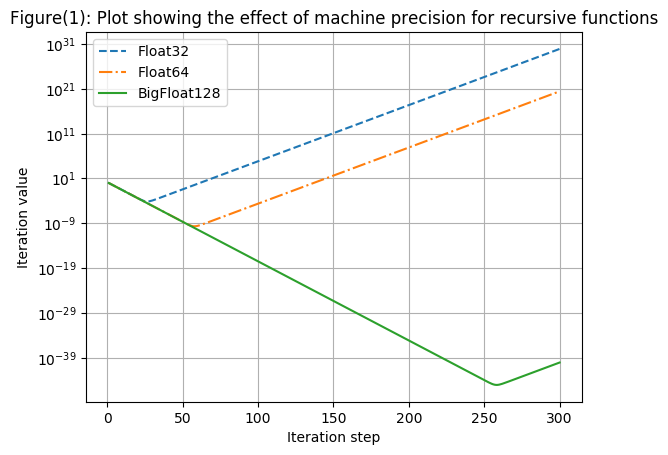

In [23]:
maxStep=300; # greater than the required 80 for illustrative purposes
n=collect(1:1:maxStep)

figure()
plot(n,recursion(Float32(1.0),Float32(2)/Float32(3),Float32(2.0),Float32(8)/Float32(9),maxStep), linestyle="--",label="Float32")
plot(n,recursion(1.0,2/3,2.0,8/9,maxStep), linestyle="-.",label="Float64")
plot(n,recursion(BigFloat(1.0),BigFloat(2)/BigFloat(3),BigFloat(2.0),BigFloat(8)/BigFloat(9),maxStep), label="BigFloat128")
legend()
grid()
xlabel("Iteration step")
ylabel("Iteration value")
yscale("log")
title("Figure(1): Plot showing the effect of machine precision for recursive functions")

Figure(1) demonstrates the machine prescision of the Float32 and Float 64 types with Float32 diverging before Float64 diverges.  When Julia's  BigFloat type is used, which has 128 bit prescision, the relation may be repeated many more times before divergence.

Solving for the general solution: $$a_{n+1} = 2\, a_n - \frac{8}{9}\, a_{n-1}$$

Using $a_{n} = x^{n}$,

$$x^{n+1}=2x^{n}-\frac{8}{9}x^{n-1}  \implies x^{n-1}\Big(x^{2}-2x+\frac{8}{9}\Big)=0  \implies x=0,\frac{2}{3}, \frac{4}{3}$$

Which provides the general solution:
$$ a_{n}=C_{1}\Big(\frac{4}{3}\Big)^{n}+C_{2}\Big(\frac{2}{3}\Big)^{n}$$

For the initial conditions $a_1=1$ and $a_2=\frac{2}{3}$:

$$1=C_{1}\frac{4}{3}+C_{2}\frac{2}{3} \  \text{and} \ \frac{2}{3}=C_{1}\Big(\frac{4}{3}\Big)^{2}+C_{2}\Big(\frac{2}{3}\Big)^{2} $$

$\implies C_1=0$ and $C_2=\frac{3}{2}$ and the particular solution:

$$a_n=\frac{3}{2}\Big(\frac{2}{3}\Big)^n$$

For the initial conditions $a_1=1$ and $a_2=\frac{2}{3} + \epsilon$:

$$1=C_{1}\frac{4}{3}+C_{2}\frac{2}{3} \ \text{and} \ \frac{2}{3} + \epsilon=C_{1}\Big(\frac{4}{3}\Big)^{2}+C_{2}\Big(\frac{2}{3}\Big)^{2} $$

$\implies C_1=\frac{9\epsilon}{8}$ and $C_2=\frac{6-9\epsilon}{4}$ and the particular solution:

$$a_n=\frac{9\epsilon}{8}\Big(\frac{4}{3}\Big)^{n} + \frac{6-9\epsilon}{4}\Big(\frac{2}{3}\Big)^n$$

if $\epsilon \rightarrow 0$ then we get the analytical result for the unperturbed solution.  The machine precision error for Float32 types is greater than that for Float64, so $\epsilon$ for Float32 is greater than that for Float64.  Therefore the solution $\Big(\frac{4}{3}\Big)^{n}$ dominates for Float32 at lower n than for Float64.

## Question 2: Computational complexity of the mergesort algorithm

Consider two arrays of integers, A and B, having lengths n and m respectively. Assuming that the elements of A and B are already sorted in ascending order. The following recursive function merges them to return an array of length n+m whose elements are sorted in ascending order:



function mergepresorted(A::Array{Int64,1}, B::Array{Int64,1})

The computational complexity of this function is $n+m$.

1. Verify that the function mergepresorted(A, B) works as described.
2. Write a recursive function that implements the mergesort algorithm for an array of integers whose length, $n$ is a power of 2: $n=2^m$. Verify that it works by generating some arrays of random integers and using your function to sort them.
3. Explain why the computational complexity, $F(n)$, of your mergesort algorithm satisfies the recursion
> $F(n) = 2\, F(\frac{n}{2}) + n\ \ \ \ $ with initial condition $F(1)=1$.  
4. Introduce the new variable p defined by $n = 2^p$ and let $b_p = F(2^p)$. Show that in these variables the above equation takes the form
> $b_p = 2 b_{p−1} + 2^p\ \ \ \ $ with initial condition $b_0 = 1$.
5. Find the general solution to the associated homogeneous recursion relation (ie without the $2^p$ term).
6. Find a particular solution of the original inhomogenous recursion relation and use the initial condition to determine the constant in the homogenous solution.
7. Hence show that the computational complexity of the mergesort algorithm is
> $F(n) = O(n\, \log n)$.
8. Use Julia's @timed macro to measure the execution time of your mergesort function for arrays of lengths $\{2^i : i =1 : 15\}$. Compare the results to the theoretical expectations.

In [13]:
a=[1,4,6,8]
b=[2,3,5,7]
println(mergepresorted(a,b))

[1,2,3,4,5,6,7,8]


The code verifies that the mergepresorted(A,B) algorithm works as described taking in two arrays which are already in order and providing a single sorted array as an output.

In [7]:
AM=rand(1:10,8)
mixSort=mergeSort(AM)
print("Random array: ")
print(AM)
println()
print("Sorted array: ")
print(mixSort)

Random array: [3,5,3,9,2,7,6,5]
Sorted array: [2,3,3,5,5,6,7,9]

The code verifies that the mergesort algorithm works as descibed as a random integer array is formed and then sorted into an array of increasing integers.

Each step in the mergesort(A) algorithm takes the previous array and splits the array into two arrays of size $m=\frac{n}{2}$ i.e $A[1:m] , B[m+1:n]$ hence $F(n) \sim 2F\Big(\frac{n}{2}\Big)$ this continues until the array has been broken into n subarrays of size 1 which then takes n stpes to reform into the sorted full array with each array of size 1 taking 1 step to sort $F(1)=1$.  Therefore $$F(n) = 2F\Big(\frac{n}{2}\Big) + n$$

Using the ansatz $n=2^{p}$ and with $b_p=F(2^p)$:

$$F(2^p)=2F(2^{p-1})+2^P  \implies b_p=2b_{p-1}+2^p \ \text{with} \ 1=F(1)=F(2^0)=b_0=1$$

$$\text{Therefore} \ b_p=2b_{p-1}+2^p \ \text{with} \ b_0=1$$

Consider $b_p=2b_{p-1}$ with the ansatz $b_p=\lambda^p$:

$$ \lambda^p=2\lambda^{p-1} \implies 0=\lambda^{p-1}(2-\lambda) \implies \lambda=2,0$$

Therefore the general solution to the homogeneous recusion relation is: 
$$b_p=2^p$$

For the inhomogeneous recursion relation consider the ansatz $b_p=(A+Bp)2^p$:

$$(A+Bp)2^p=(A+B(p-1))2^p+2^p \implies A+Bp=A+B(P-1)+1 \implies Bp=B(p-1) \implies B=1$$
$$ b_0=1 \implies A=1$$

Therefore the general solution to the inhomogeneous recusion relation is: 
$$b_p=p2^p$$

Therefore as $F(n)=F(2^p)=b_p$, the computational complexity is given by:
$$F(n)=\frac{nlog(n)}{log(2)}+1 \sim O(nlog(n))$$

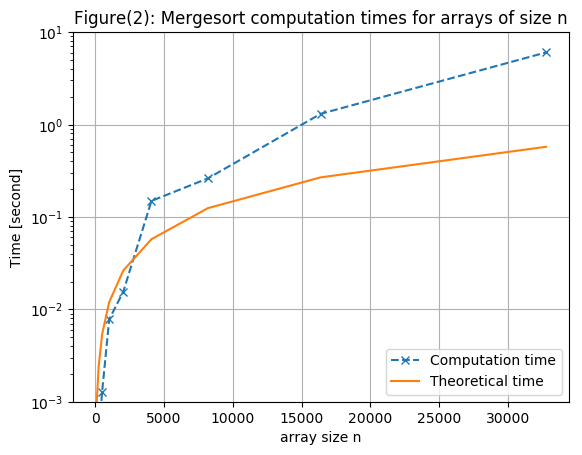

In [37]:
arrayLengths=collect(1:1:15)
times=[] 
for i=1:15
    A=rand(1:32768,2^i)
    ~,t,~,~,~ = @timed mergeSort(A)
    push!(times,t)
end
n=2.^arrayLengths
ytheory=times[1].*n.*log(n)

plot(n,times, linestyle="--",marker="x",label="Computation time")
plot(n,ytheory,label="Theoretical time")
xlabel("array size n")
ylabel("Time [second]")
yscale("log")
#xscale("lin")
legend(loc=4)
ylim([0.001,10])
grid()
title("Figure(2): Mergesort computation times for arrays of size n");

Figure(2) shows that the computation time for arrays of size n scales as $O(nlogn)$.